# SISTEMA EXPERTO BASADO EN REGLAS DIFUSAS

## TOOLS TRAVEL

A continuación se plantea un sistema de control difuso donde según, el hotel recomendado y la comida dada en promocion por ese hotel se asigna una calificación de satisfacción y un porcentaje de recomendación para los futuros viajeros.

También se plantea calificar el destino turistico recomendado en base a su atractivo y tiempo de llegada desde el hotel de alojamiento. 

Estas calificaciones van de 0 a 10 y los usuarios pueden medir su nivel de satisfacción entre 0 y 100%


### Entradas (Antecedentes)

#### Hotel recomendado
    Universo: definido entre 0 y 10
    Conjunto borroso: bueno,regular,malo
    
#### Comida en promoción
    Universo: definido entre 0 y 10
    Conjunto borroso: buena,regular,mala
    
#### Destino recomendado
    Universo: definido entre 0 y 10
    Conjunto borroso: bueno,regular,malo

#### Cercania con hotel
    Universo: definido entre 0 y 10
    Conjunto borroso: mínima,cercana,amplia

### Salidas (Consecuentes)


#### Nivel de satisfacción

    Universo: escalado entre 0 y 100%
    Conjunto borroso: alta,mediana,baja

#### Recomendación destino turistico

    Universo: escalado entre 0 y 100%
    Conjunto borroso: alta,mediana,baja

### Reglas

-> SI el hotel recomendado era bueno o la comida en promoción era buena, ENTONCES el nivel de satisfacción sera ALTO.

-> SI el hotel recomendado era regular, ENTONCES el nivel de satisfacción sera MEDIO.

-> SI el hotel recomendado era malo o la comida en promoción era mala, ENTONCES el nivel de satisfacción sera BAJA.

-> SI el destino recomendado era bueno o la cercania con hotel era mínima, ENTONCES el nivel de recomendacion sera ALTO.

-> SI el destino recomendado era regular, ENTONCES el nivel de recomendacion sera MEDIO.

-> SI el destino recomendado era malo o la cercania con hotel era amplia, ENTONCES el nivel de recomendacion sera BAJO.

### USO

### Librerias

en esta parte se importan las librerias a utilizar en el desarrollo del código, en este caso se trabajara con la libreria numpy para para las operaciones matematicas y skfuzzy que nos permitira utilizar algoritmos diseñados para lógica difusa.

In [258]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Antecedentes y Consecuentes

Se defines cuales van a ser las entradas y salidas del sistema, indicando mediante un rango el universo de datos de cada una.

In [259]:
H_recomendado = ctrl.Antecedent (np.arange (0,11,1), 'H_recomendado')
C_promocion = ctrl.Antecedent (np.arange (0,11,1), 'C_promocion')
D_recomendado = ctrl.Antecedent (np.arange (0,11,1), 'D_recomendado')
C_hotel = ctrl.Antecedent (np.arange (0,11,1), 'C_hotel')
satisfaccion = ctrl.Consequent (np.arange (0,100,1), 'satisfaccion')
recomendacion = ctrl.Consequent (np.arange (0,100,1), 'recomendacion')

### Definir el número de terminos que llevara cada variable difusa

Dependiendo de la variable, esta puede tener diferentes terminos que la compongan, generalmente estos rangos se encuentran entre 3,5 y 7... en esta ocasión, se asignara el número 3 para la cantidad de terminos a utilizar.

In [260]:
H_recomendado.automf(3)
C_promocion.automf(3)
D_recomendado.automf(3)
C_hotel.automf(3)

### Definir las variables de membresia personalizadas

Parametrizar las variables de membresia según las mediciones que se quieran definir, dependiendo del valor máximo predeterminado anteriormente, cada variable debera tener el rango de medición según el universo establecido

In [261]:
satisfaccion ['low'] = fuzz.trimf(satisfaccion.universe, [0,0,50])
satisfaccion ['medium'] = fuzz.trimf(satisfaccion.universe, [0,50,100])
satisfaccion ['high'] = fuzz.trimf(satisfaccion.universe, [50,100,100])
recomendacion ['low'] = fuzz.trimf(recomendacion.universe, [0,0,50])
recomendacion ['medium'] = fuzz.trimf(recomendacion.universe, [0,50,100])
recomendacion ['high'] = fuzz.trimf(recomendacion.universe, [50,100,100])

### Reglas

se parametrizan las reglas según se definio la funcionalidad del sistema

In [262]:
rule1 = ctrl.Rule(H_recomendado['poor'] | C_promocion['poor'], satisfaccion['low'])
rule2 = ctrl.Rule(H_recomendado['average'], satisfaccion['medium'])
rule3 = ctrl.Rule(H_recomendado['good'] | C_promocion['good'], satisfaccion['high'])
rule4 = ctrl.Rule(D_recomendado['poor'] | C_hotel['poor'], recomendacion['low'])
rule5 = ctrl.Rule(D_recomendado['average'], recomendacion['medium'])
rule6 = ctrl.Rule(D_recomendado['good'] | C_hotel['good'], recomendacion['high'])

### Sistema de control

luego de tener las reglas definidas se crean sistemas de controles para ejecutar las pruebas y obtener los resultados que nos arrojara el sistema, esto se hara mediante un sistema de simulación que se creara con la instrucción ControlSystemSimulation.

In [263]:
satisfaction_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
recomendation_ctrl = ctrl.ControlSystem([rule4,rule5,rule6])

In [264]:
satisfaction = ctrl.ControlSystemSimulation(satisfaction_ctrl)
recomendation = ctrl.ControlSystemSimulation(recomendation_ctrl)

### Simulación asignando valores

Simulación del sistema de control asignado valores de entrada y llamando al metodo compute para calcular la salida.

In [268]:
satisfaction.input['H_recomendado'] = 1.4
satisfaction.input['C_promocion'] = 2.3
recomendation.input['D_recomendado'] = 9.8
recomendation.input['C_hotel'] = 9.8

In [269]:
satisfaction.compute()
recomendation.compute()

### Visualización

una vez se calcula se puede apreciar el resultado y mirar una gráfica respectiva para cada uno, estos resultados dependeran de las valores que se asignen a las variables y las reglas definidas.

36.68719056620752
78.3015384615385


C:\Users\Esteban\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


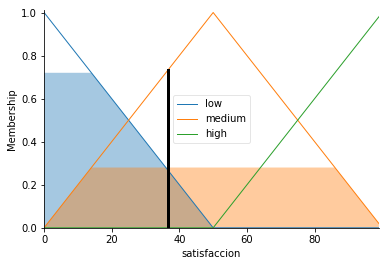

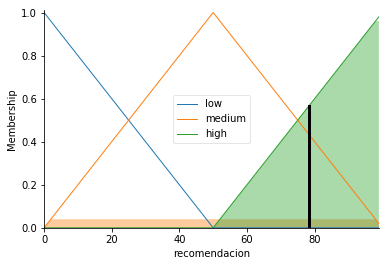

In [270]:
print (satisfaction.output['satisfaccion'])
satisfaccion.view(sim=satisfaction)

print (recomendation.output['recomendacion'])
recomendacion.view(sim=recomendation)

### Resultados

como se puede apreciar en las gráficas, según los valores que se le asignaron a las variables el grado de satisfacción fue bajo debido a que tanto el hotel recomendado, como la comida en promoción fueron calificados con valores bajos dentro del universo establecido. Se puede observar que el sistema nos arroja un resultado de satisfacción del 36.6%

por otro lado, a la salida de recomendación se le asignaron valores altos, podemos observar en la gráfica como el sistema muestra que la recomendación fue alta con un valor de 78.3% de faborabilidad.